In [1]:
import numpy as np
from matplotlib import pyplot as plt


In [2]:
def min_dnl(ra_list,rb):
  num_buttons = len(ra_list)-1

  num_ladder_r = num_buttons +1
  combinations = []

  for i in range(0,2**num_buttons):
    myvec = np.zeros(num_buttons)
    for j in range(0,num_buttons):
      k = (i & 1<<j)>>j
      myvec[j] = k
      
    if(myvec.sum() <= 2):
      combinations += [myvec.tolist()]
    
  fractions = []
  buttons_pressed = []
  combination_number = []
  
  counter = 0
  for state in combinations:
    npra = np.array(ra_list)    
  
    r_ladder_down = npra.sum()
    r_ladder_up   = npra.sum()
      
    for j in range(0,num_buttons):
      k = state[j]
      if (k>0): ## switch j is closed
        r_ladder_down_ = npra[0:(j+1)].sum()
        r_ladder_down = np.min([r_ladder_down,r_ladder_down_])
        r_ladder_up_ = npra[(j+1):len(npra)].sum()
        r_ladder_up = np.min([r_ladder_up,r_ladder_up_])       
            
          
          
    r_up = r_ladder_up
    # parallel of ladder down and output parallel resistor
    r_down = 1./(1./r_ladder_down + 1./rb)
  
    voltage_fraction = r_down/(r_up + r_down)
    # special case: no button press
    if (np.array(state).sum() ==0):
      voltage_fraction = 0
    
    fractions += [voltage_fraction]
    buttons_pressed += [np.array(state).sum()]
    combination_number += [counter]
    counter += 1
  
  
  fractions_sorted = fractions.copy()
  fractions_sorted.sort()
  dnl = []
  for i in range(1,len(fractions_sorted)):
    dnl += [fractions_sorted[i]-fractions_sorted[i-1]]
    
  min_dnl = np.min(dnl)

  return min_dnl

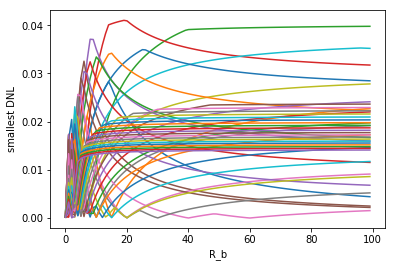

In [3]:
rbs = np.arange(0.1,100,1)
ras = np.arange(0.5,5,0.1)

for ra in ras:

  dnls = [ min_dnl([1,1,1,1,ra],x) for x in rbs]

  plt.plot(rbs,dnls)
plt.xlabel("R_b")
plt.ylabel("smallest DNL")

plt.show()

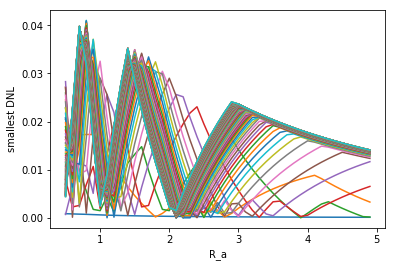

In [4]:

for rb in rbs:

  dnls = [ min_dnl([1,1,1,1,x],rb) for x in ras]

  plt.plot(ras,dnls)
plt.xlabel("R_a")
plt.ylabel("smallest DNL")

plt.show()

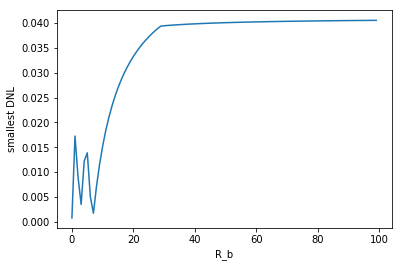

In [5]:
ra = 0.72
dnls = [ min_dnl([1,1,1,1,ra],x) for x in rbs]

plt.plot(rbs,dnls)
plt.xlabel("R_b")
plt.ylabel("smallest DNL")

plt.show()

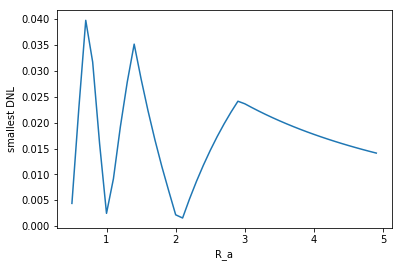

In [6]:

rb = 100

dnls = [ min_dnl([1,1,1,1,x],rb) for x in ras]

plt.plot(ras,dnls)
plt.xlabel("R_a")
plt.ylabel("smallest DNL")

plt.show()

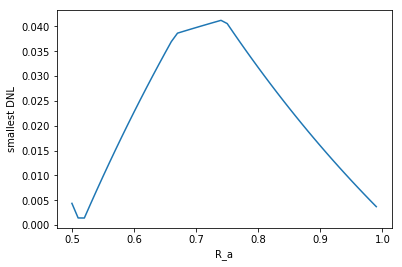

In [7]:

rb = 100
ras = np.arange(0.5,1,0.01)

dnls = [ min_dnl([1,1,1,1,x],rb) for x in ras]

plt.plot(ras,dnls)
plt.xlabel("R_a")
plt.ylabel("smallest DNL")

plt.show()

In [8]:
min_dnl([1,1,1,1,0.75],100) 

0.040588457469497685